In [1]:
from sklearn import preprocessing, neighbors, naive_bayes, neural_network, svm, tree
from sklearn.metrics import *
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import tensorflow as tf
from tensorflow.keras import layers, regularizers

In [3]:
df = pd.read_csv('pd_speech_features.csv')
#df = pd.read_csv('pd_speech_features_252.csv')

In [4]:
Xraw = np.array(df.drop("class", axis='columns'))
y = np.array(df['class'])

In [ ]:
X_norm_temp = np.divide((Xraw - Xraw.mean(0)), Xraw.var(0))
min_max_scaler = preprocessing.MinMaxScaler()
normalizedData = min_max_scaler.fit_transform(X_norm_temp)

In [6]:
X = normalizedData
print(X.shape)

(756, 752)


In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(47, activation='tanh', kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001)),
    #tf.keras.layers.Dense(7, activation='tanh', kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [9]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'] 
)

In [10]:
#model.evaluate(X_train, y_train)

In [11]:
model_history = model.fit(X_train, y_train, batch_size=8, epochs=200, validation_data=(X_valid, y_valid))

Epoch 1/200
48/48 [==============================] - 1s 9ms/step - loss: 2.1591 - accuracy: 0.7222 - val_loss: 2.0865 - val_accuracy: 0.7725
Epoch 2/200
48/48 [==============================] - 0s 3ms/step - loss: 2.0611 - accuracy: 0.7275 - val_loss: 1.9782 - val_accuracy: 0.7725
Epoch 3/200
48/48 [==============================] - 0s 3ms/step - loss: 1.9753 - accuracy: 0.7328 - val_loss: 1.9101 - val_accuracy: 0.7989
Epoch 4/200
48/48 [==============================] - 0s 3ms/step - loss: 1.8970 - accuracy: 0.7672 - val_loss: 1.8332 - val_accuracy: 0.7989
Epoch 5/200
48/48 [==============================] - 0s 3ms/step - loss: 1.8225 - accuracy: 0.7857 - val_loss: 1.7926 - val_accuracy: 0.8571
Epoch 6/200
48/48 [==============================] - 0s 3ms/step - loss: 1.7608 - accuracy: 0.8016 - val_loss: 1.7145 - val_accuracy: 0.8466
Epoch 7/200
48/48 [==============================] - 0s 3ms/step - loss: 1.6994 - accuracy: 0.8148 - val_loss: 1.6505 - val_accuracy: 0.8466
Epoch 8/200
4

In [12]:
#model.summary()
#Predict
acc = model.evaluate(X_test, y_test)
#print("Accuracy = ", (acc*100), "%")

6/6 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.8307


In [13]:
#y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred = np.concatenate((model.predict(X_test) > 0.5).astype("int32"), axis=0 )
#y_pred = np.argmax((model.predict(X_test) > 0.5).astype("int32"), axis=1) 
#print(y_pred)

6/6 [==============================] - 0s 2ms/step


In [14]:
#print(y_test)

In [15]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f1)

0.8292989207293125


In [16]:
print("Accuracy: ", "{:.4f}".format(accuracy_score(y_test, y_pred)))
print("F1 score: ", "{:.4f}".format(f1))
print("MCC: ",  "{:.4f}".format(matthews_corrcoef(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]  
print("Sensitivity:", "{:.4f}".format(TP / (TP + FN)))
print("Specificity:", "{:.4f}".format(TN / (TN + FP)))
print("PPV: ", "{:.4f}".format(TP / (TP + FP)))
print("NPV: ", "{:.4f}".format(TN / (TN + FN)))

Accuracy:  0.8307
F1 score:  0.8293
MCC:  0.5186
Sensitivity: 0.8966
Specificity: 0.6136
PPV:  0.8844
NPV:  0.6429


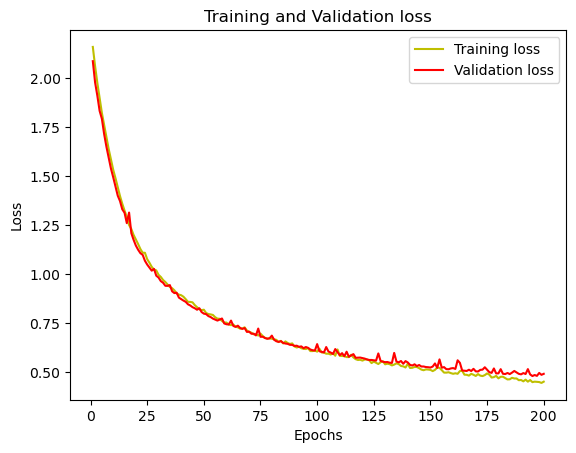

In [17]:
#Plot the training and validation accuracy and loss at each epoch
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

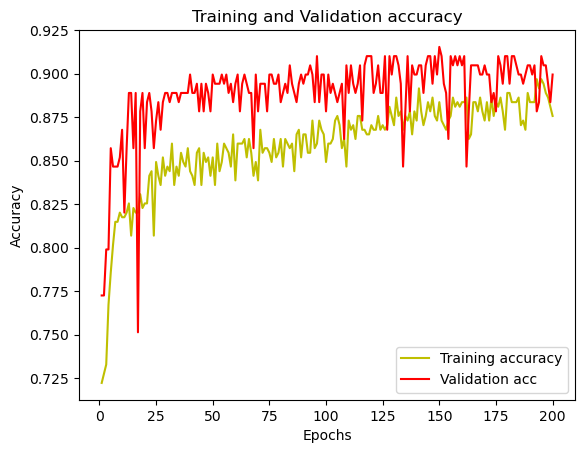

In [18]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()